# Boston Housing Price Prediction

## Importing Modules

In [1]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading Dataset

In [2]:
data= load_boston()

In [3]:
df=pd.DataFrame(data.data, columns=data.feature_names)

In [4]:
y=data.target

In [5]:
y=pd.DataFrame(y, columns=["MEDV"])

In [6]:
df=pd.concat([df,y], axis=1)

In [7]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


CRIM - per capita crime rate by town

ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS - proportion of non-retail business acres per town.

CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

NOX - nitric oxides concentration (parts per 10 million)

RM - average number of rooms per dwelling

AGE - proportion of owner-occupied units built prior to 1940

DIS - weighted distances to five Boston employment centres

RAD - index of accessibility to radial highways

TAX - full-value property-tax rate per $10,000

PTRATIO - pupil-teacher ratio by town

B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

LSTAT - percentage lower status of the population

MEDV - Median value of owner-occupied homes in $1000's

## Explortory Data Anlaysis

In [9]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [10]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

F:\softwares\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MEDV', ylabel='Density'>

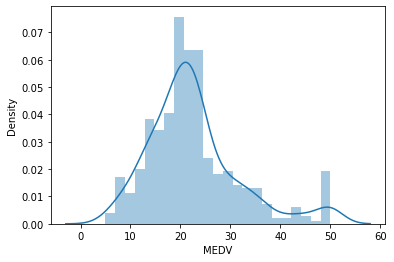

In [11]:
sns.distplot(df['MEDV'])

<AxesSubplot:>

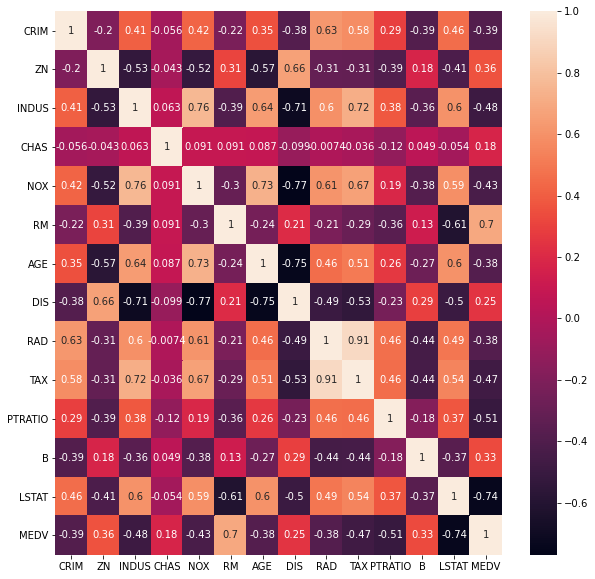

In [12]:
corr=df.corr()
fig, ax= plt.subplots(figsize=(10,10))
sns.heatmap(corr,annot=True,ax=ax)

## Preprocessing and Feature Selection

In [13]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

X=df.drop(['MEDV'],axis=1)
y=df['MEDV']

feature = SelectKBest(f_regression, k=5)

best_features = feature.fit_transform(X,y)

In [14]:
best_features[:5]

array([[  2.31 ,   6.575, 296.   ,  15.3  ,   4.98 ],
       [  7.07 ,   6.421, 242.   ,  17.8  ,   9.14 ],
       [  7.07 ,   7.185, 242.   ,  17.8  ,   4.03 ],
       [  2.18 ,   6.998, 222.   ,  18.7  ,   2.94 ],
       [  2.18 ,   7.147, 222.   ,  18.7  ,   5.33 ]])

In [15]:
filter = feature.get_support()
features = np.array(data.feature_names)
 
print("All features:")
print(features)
 
print("Selected best 8:")
print(features[filter])
print(best_features) 

All features:
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
Selected best 8:
['INDUS' 'RM' 'TAX' 'PTRATIO' 'LSTAT']
[[  2.31    6.575 296.     15.3     4.98 ]
 [  7.07    6.421 242.     17.8     9.14 ]
 [  7.07    7.185 242.     17.8     4.03 ]
 ...
 [ 11.93    6.976 273.     21.      5.64 ]
 [ 11.93    6.794 273.     21.      6.48 ]
 [ 11.93    6.03  273.     21.      7.88 ]]


In [19]:
df=df.drop(['CRIM','ZN','CHAS','NOX','AGE','DIS','RAD','B'],axis=1)

In [21]:
df

,INDUS,RM,TAX,PTRATIO,LSTAT,MEDV
0,2.31,6.575,296.0,15.3,4.98,24.0
1,7.07,6.421,242.0,17.8,9.14,21.6
2,7.07,7.185,242.0,17.8,4.03,34.7
3,2.18,6.998,222.0,18.7,2.94,33.4
4,2.18,7.147,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...
501,11.93,6.593,273.0,21.0,9.67,22.4
502,11.93,6.120,273.0,21.0,9.08,20.6
503,11.93,6.976,273.0,21.0,5.64,23.9
504,11.93,6.794,273.0,21.0,6.48,22.0


### Removing Outliers

<AxesSubplot:xlabel='MEDV'>

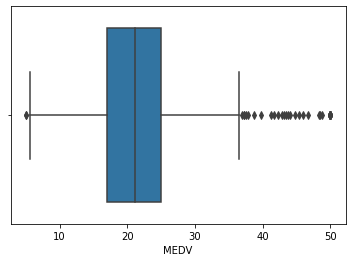

In [27]:
sns.boxplot(x=df['MEDV'])

In [66]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df_out.shape

(443, 6)

In [90]:
df_out=df_out.reset_index(drop=True)

In [92]:
X=df_out[['INDUS','RM','TAX','PTRATIO','LSTAT']]
y=df_out['MEDV']

### Scaling

In [96]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled=scaler.fit_transform(X)
scaled=pd.DataFrame(scaled)

In [97]:
X['INDUS']=scaled[0]
X['RM']=scaled[1]
X['TAX']=scaled[2]
X['PTRATIO']=scaled[3]
X['LSTAT']=scaled[4]

<ipython-input-97-a8f0475790af>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['INDUS']=scaled[0]
<ipython-input-97-a8f0475790af>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['RM']=scaled[1]
<ipython-input-97-a8f0475790af>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ve

In [98]:
X

,INDUS,RM,TAX,PTRATIO,LSTAT
0,-1.342494,0.783279,-0.680088,-1.782299,-1.253307
1,-0.636440,0.462676,-1.004723,-0.471089,-0.600786
2,-0.636440,2.053200,-1.004723,-0.471089,-1.402320
3,-1.361777,1.663896,-1.124958,0.000947,-1.573293
4,-1.361777,1.974090,-1.124958,0.000947,-1.198407
...,...,...,...,...,...
438,0.084448,0.820752,-0.818359,1.207261,-0.517653
439,0.084448,-0.163958,-0.818359,1.207261,-0.610198
440,0.084448,1.618095,-0.818359,1.207261,-1.149782
441,0.084448,1.239201,-0.818359,1.207261,-1.018023


## Model Building 

In [99]:
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from sklearn.svm import SVR

In [100]:
xgb=XGBRegressor()
forest=RandomForestRegressor()
reg=GradientBoostingRegressor()
light=LGBMRegressor()
svr=SVR(kernel='linear')

In [101]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X, y, test_size=0.25, random_state=20)

In [102]:
from sklearn.model_selection import cross_val_score

xgb_scores=cross_val_score(xgb, x_train, y_train, cv=3)
forest_scores=cross_val_score(forest, x_train, y_train, cv=3)
reg_scores=cross_val_score(reg, x_train, y_train, cv=3)
light_scores=cross_val_score(light, x_train, y_train, cv=3)
svr_scores=cross_val_score(svr, x_train, y_train, cv=3)

In [103]:
print(np.mean(xgb_scores))
print(np.mean(forest_scores))
print(np.mean(reg_scores))
print(np.mean(light_scores))
print(np.mean(svr_scores))

0.7244225764622634
0.7749622590807984
0.763130333851603
0.7803376128278243
0.7027647502740372


In [104]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression

base_models=[('random_forest',forest),
             #('xgb',xgb),
             ('reg',reg),]
             #('light',light)]
meta_model=light

stacking_model=StackingRegressor(estimators=base_models,
                                final_estimator=meta_model,
                                passthrough=True,
                                cv=3,
                                verbose=2)

In [105]:
scores=cross_val_score(stacking_model, x_train, y_train, cv=3)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent work

In [106]:
np.mean(scores)

0.7825222004148881

In [107]:
reg.fit(x_train,y_train)
stacking_model.fit(x_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished


StackingRegressor(cv=3,
                  estimators=[('random_forest', RandomForestRegressor()),
                              ('reg', GradientBoostingRegressor())],
                  final_estimator=LGBMRegressor(), passthrough=True, verbose=2)

In [108]:
pred1=reg.predict(x_test)
pred2=stacking_model.predict(x_test)

In [109]:
from sklearn.metrics import mean_squared_error

print("GradientBoostingRegressor MSE",np.sqrt(mean_squared_error(y_test,pred1)))
print("Stacking model MSE",np.sqrt(mean_squared_error(y_test,pred2)))

GradientBoostingRegressor MSE 3.165051432694736
Stacking model MSE 3.2242143861150967
